In [73]:
%matplotlib inline
import pandas as pd
import json
import os
from statsbombpy import sb
from mplsoccer import Pitch, Sbopen
import matplotlib.pyplot as plt

In [74]:
sb.competitions()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
69,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250
71,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
72,72,107,International,Women's World Cup,female,False,True,2023,2024-07-14T16:59:48.469596,2024-07-14T17:01:38.887279,2024-07-14T17:01:38.887279,2024-07-14T16:59:48.469596


In [75]:
euros_2024_competition_id = 55
euros_2024_season_id = 282
matches = sb.matches(competition_id=euros_2024_competition_id, season_id=euros_2024_season_id)

In [76]:
spain_matches = matches[(matches['home_team'] == 'Spain') | (matches['away_team'] == 'Spain')]
for _, match in spain_matches.iterrows():
    match_id = match['match_id']
    
    print(f"Match ID: {match_id}")

Match ID: 3943043
Match ID: 3942752
Match ID: 3942226
Match ID: 3941018
Match ID: 3930179
Match ID: 3930172
Match ID: 3930160


In [77]:
lineups = sb.lineups(match_id=3943043)
lineups

{'Spain':     player_id                      player_name   player_nickname  \
 0        3042               Mikel Merino Zazón      Mikel Merino   
 1        3265         José Luis Sanmartín Mato            Joselu   
 2        3477       Álvaro Borja Morata Martín     Álvaro Morata   
 3        4127                David Raya Martin        David Raya   
 4        4353                  Aymeric Laporte              None   
 5        5202  José Ignacio Fernández Iglesias             Nacho   
 6        5721            Daniel Carvajal Ramos   Daniel Carvajal   
 7        6655                 Fabián Ruiz Peña       Fabián Ruiz   
 8        6685           Mikel Oyarzabal Ugarte   Mikel Oyarzabal   
 9        6748             Ferrán Torres García     Ferrán Torres   
 10       6765       Rodrigo Hernández Cascante             Rodri   
 11       6821             Jesús Navas González       Jesús Navas   
 12      10336        Alejandro Grimaldo García     Álex Grimaldo   
 13      11748           

In [78]:
parser = Sbopen()
df, related, freeze, tactics = parser.event(3942752)
team1, team2 = df.team_name.unique()
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')

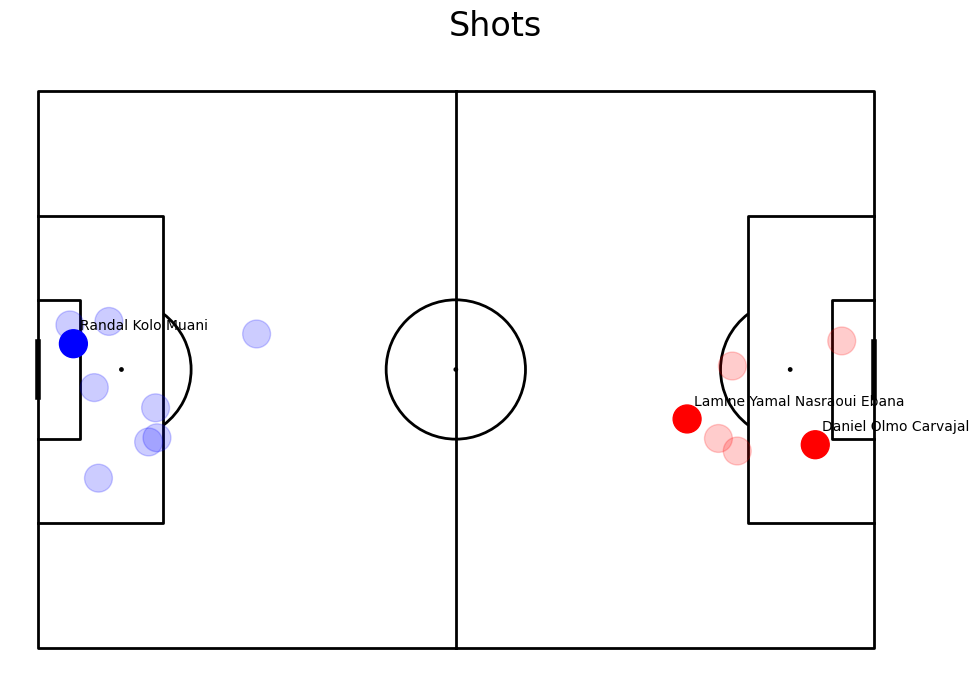

In [79]:
pitch = Pitch(line_color = "black")
fig, ax = pitch.draw(figsize=(10, 7))
pitchLengthX = 120
pitchWidthY = 80
for i,shot in shots.iterrows():
    x=shot['x']
    y=shot['y']
    goal=shot['outcome_name']=='Goal'
    team_name=shot['team_name']    
    circleSize=2
    if (team_name==team1):
        if goal:
            shotCircle=plt.Circle((x,y),circleSize,color="red")
            plt.text(x+1,y-2,shot['player_name']) 
        else:
            shotCircle=plt.Circle((x,y),circleSize,color="red")     
            shotCircle.set_alpha(.2)
    else:
        if goal:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue") 
            plt.text(pitchLengthX-x+1,pitchWidthY - y - 2 ,shot['player_name'])
        else:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue")      
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)
fig.suptitle("Shots", fontsize = 24)     
fig.set_size_inches(10, 7)
plt.show()

In [80]:
olmo_shots_passes = []
for _, match in spain_matches.iterrows():
    match_id = match['match_id']
    home_team = match['home_team']
    away_team = match['away_team']
    parser = Sbopen()
    df, related, freeze, tactics = parser.event(match_id)
    
    df_olmo = df[(df['player_name'] == 'Daniel Olmo Carvajal') & (df['type_name'].isin(['Shot', 'Pass']))]
    if not df_olmo.empty:
        olmo_shots_passes.append((df_olmo, match_id, home_team, away_team))

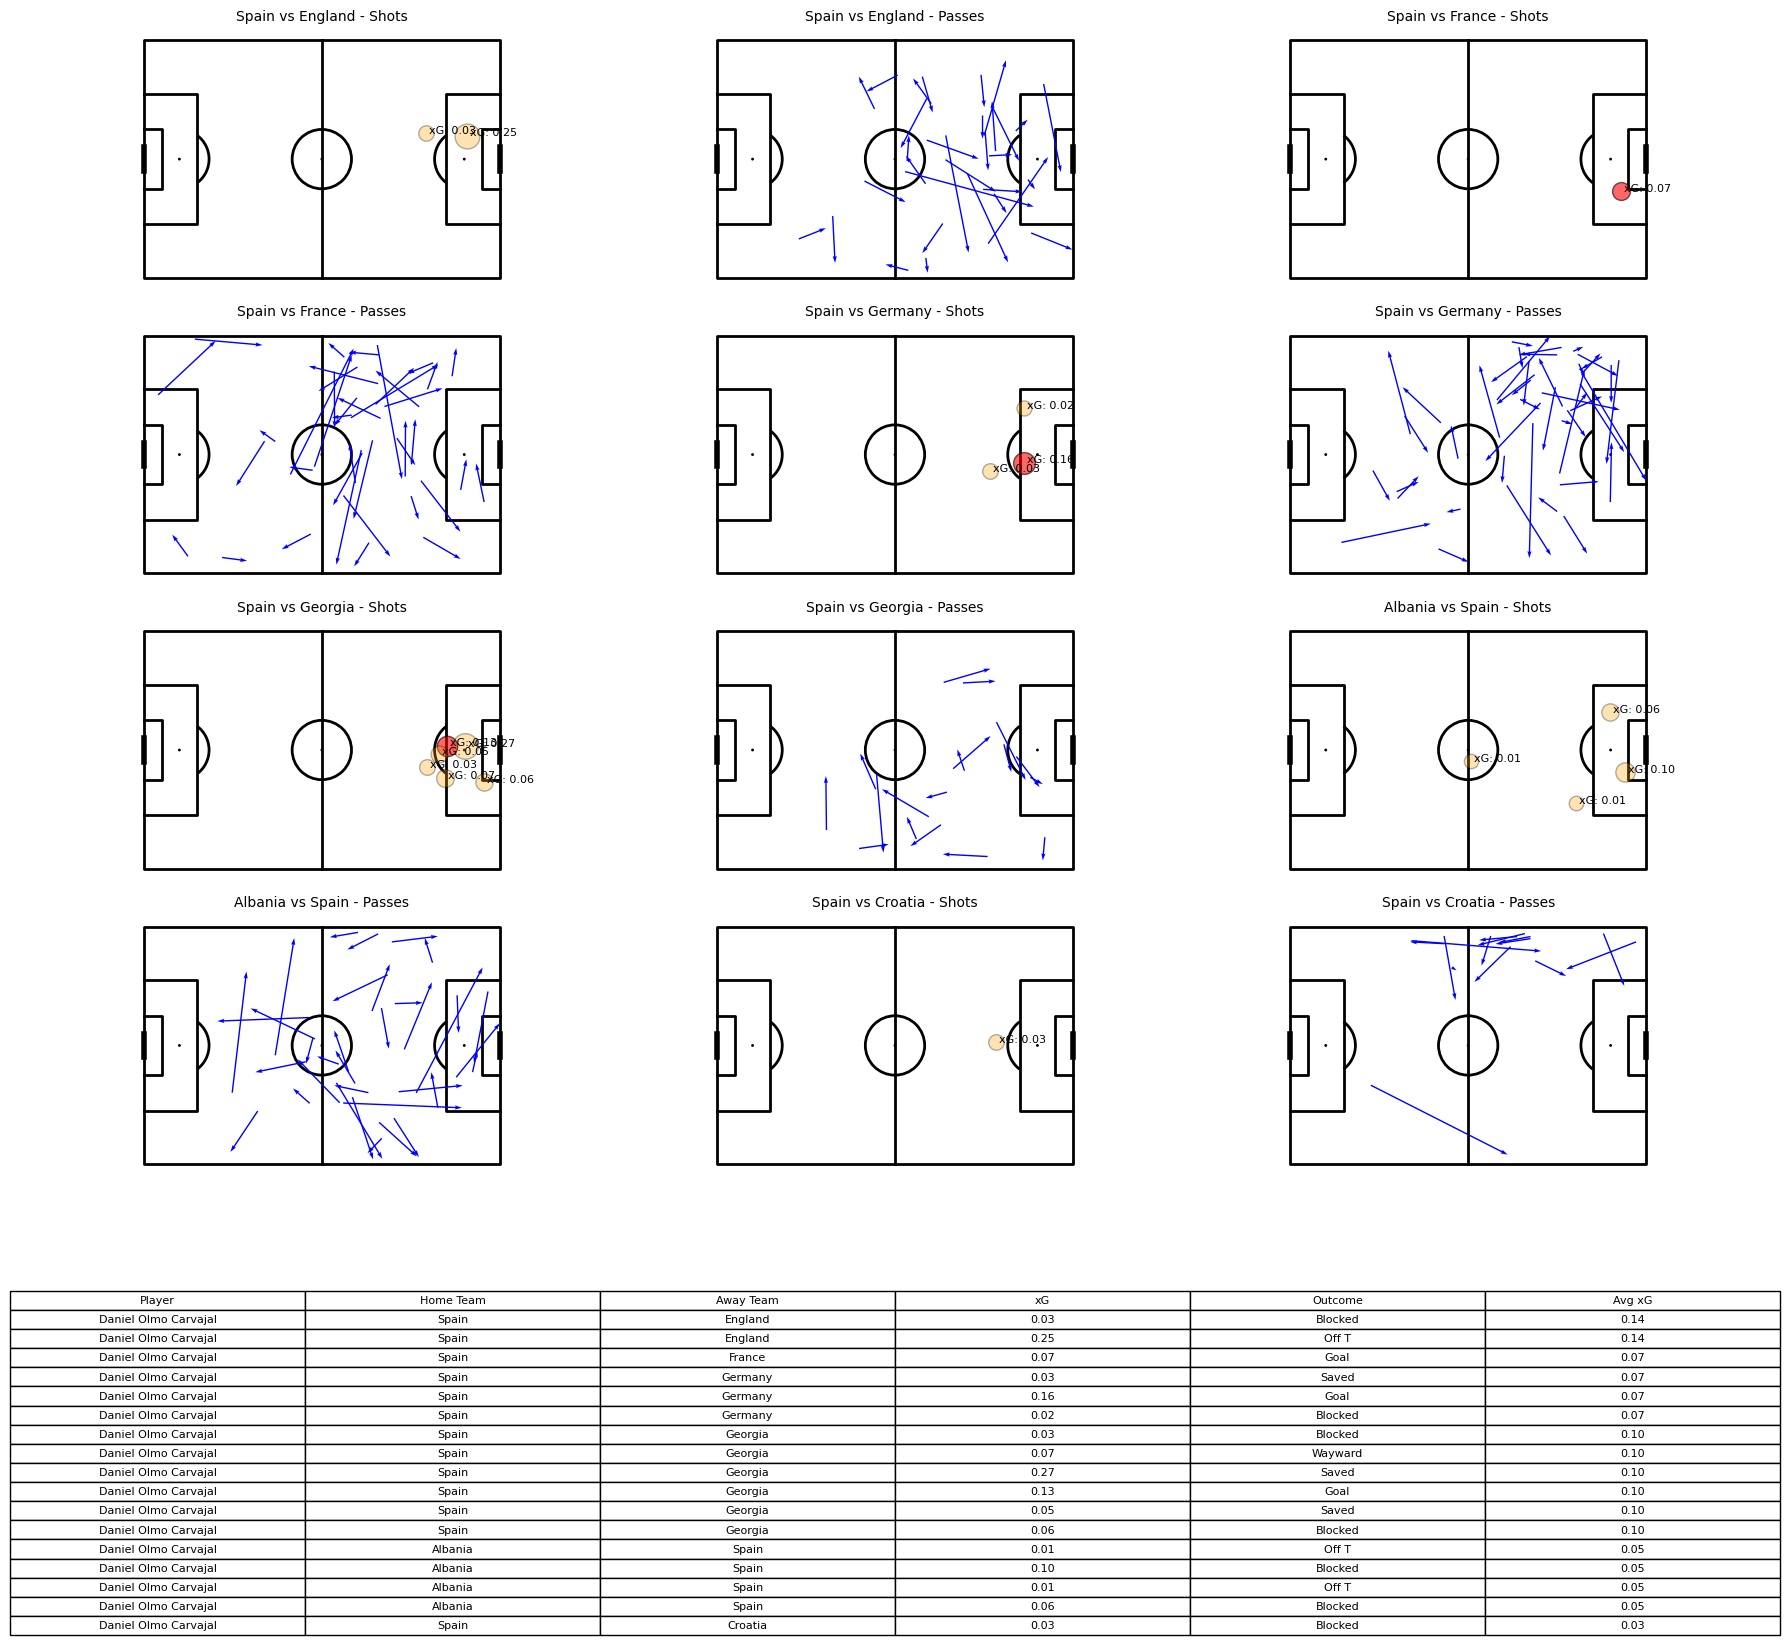

In [81]:
from matplotlib import gridspec
num_matches = len(olmo_shots_passes)
cols = min(3, num_matches)
rows = (num_matches + cols - 1) // cols

fig = plt.figure(figsize=(cols * 6, rows * 8), facecolor='white')
gs = gridspec.GridSpec(rows * 2, cols)

pitch = Pitch(line_color='black', pitch_color='white')

for i, (df_olmo, match_id, home_team, away_team) in enumerate(olmo_shots_passes):
    ax_shots = fig.add_subplot(gs[i * 2], facecolor='white')
    ax_passes = fig.add_subplot(gs[i * 2 + 1], facecolor='white')

    pitch.draw(ax=ax_shots)
    pitch.draw(ax=ax_passes)

    shots = df_olmo[df_olmo['type_name'] == 'Shot']
    passes = df_olmo[df_olmo['type_name'] == 'Pass']

    for _, shot in shots.iterrows():
        x, y = shot['x'], shot['y']
        xg = shot['shot_statsbomb_xg'] 
        goal = shot['outcome_name'] == 'Goal'
        circle_size = (xg * 900) + 100
        
        color = 'red' if goal else 'orange'
        alpha = 0.6 if goal else 0.3

        ax_shots.scatter(x, y, s=circle_size, color=color, alpha=alpha, edgecolor='black', zorder=2)
        ax_shots.text(x + 1, y, f"xG: {xg:.2f}", fontsize=8, color='black', zorder=3)

    for _, p in passes.iterrows():
        pitch.arrows(p['x'], p['y'], p['end_x'], p['end_y'], color='blue', ax=ax_passes, width=1, zorder=1)

    ax_shots.set_title(f"{home_team} vs {away_team} - Shots", fontsize=10)
    ax_passes.set_title(f"{home_team} vs {away_team} - Passes", fontsize=10)

for i in range(len(olmo_shots_passes) * 2, rows * cols * 2):
    fig.delaxes(fig.axes[i])

table_data = []
for df_olmo, match_id, home_team, away_team in olmo_shots_passes:
    shots = df_olmo[df_olmo['type_name'] == 'Shot']
    avg_xg = shots['shot_statsbomb_xg'].mean()  
    
    for _, shot in shots.iterrows():
        table_data.append([shot['player_name'], home_team, away_team, f"{shot['shot_statsbomb_xg']:.2f}", shot['outcome_name'], f"{avg_xg:.2f}"])

table_df = pd.DataFrame(table_data, columns=['Player', 'Home Team', 'Away Team', 'xG', 'Outcome', 'Avg xG'])

fig.subplots_adjust(bottom=0.25)
ax_table = fig.add_subplot(111, frame_on=False)
ax_table.xaxis.set_visible(False)
ax_table.yaxis.set_visible(False)

table = ax_table.table(cellText=table_df.values, colLabels=table_df.columns, cellLoc='center', loc='bottom', bbox=[0, -0.4, 1, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1, 1.5)

plt.tight_layout()
plt.show()